# The Gaussian Distribution

**1-Demensional Gaussian**
$$\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{1/2}}exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}$$
where $\mu$ is the mean and $\sigma^2$ is the variance.  
**D-Demensional Gaussian**
$$\mathcal{N}(\mathbf{x}|\mathbf{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right\}$$
where $\mathbf{\mu}$ is a $D$-dimensional mean vector, $\Sigma$ is a $D\times D$ convariance matrix, and $|\Sigma|$ denotes the determinant of $\Sigma$.  

# The Geometrical form of the Gaussian distribution
Now we go further into the $D$-dimensional Gaussian.  
First of all, we note that the matrix $\Sigma$ can be taken to by symmetric, without loss of generality, *because any antisymmetric component would disappear from the exponent*. Therefore, following the theorem of eigenvalue and eigenvector in linear algebra, the matrix $\Sigma$ can be diagonalized, which means that it can be factorised to the form
$$\Sigma=U\Lambda U^{-1}=U\Lambda U^{T}\quad$$
where $U$ is an orthogonal matrix that comprises $D$ eigenvectors, and $\Lambda$ is a diagonal matrix that consist of $D$ eigenvalues.
$$U=\begin{bmatrix}& & &\\ \mathbf{u}_1 &\mathbf{u}_2 &\cdots &\mathbf{u}_D\\ & & &\\ & & &\\ \end{bmatrix}\qquad
\Lambda=\begin{bmatrix}\lambda_1 &0 &\cdots &0\\ 0 &\lambda_2 &\cdots &0\\ \vdots &\vdots &\ddots &\vdots\\ 0 &0 &\cdots &\lambda_D\end{bmatrix}$$
Following the theorem in linear algebra, the $\Sigma^{-1}$ is given by
$$\Sigma^{-1}=U\Lambda^{-1}U^{T}\qquad 
\Lambda^{-1}=\begin{bmatrix}\frac{1}{\lambda_1} &0 &\cdots &0\\ 0 &\frac{1}{\lambda_2} &\cdots &0\\ \vdots &\vdots &\ddots &\vdots\\ 0 &0 &\cdots &\frac{1}{\lambda_D}\end{bmatrix}$$
Extract the quadratic form of the exponent then factorise
$$\begin{align*}\Delta^2
&=(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\\
&=(\mathbf{x}-\mathbf{\mu})^T U\Lambda^{-1}U^{T}(\mathbf{x}-\mathbf{\mu})\\
&=\mathbf{y}^{T}\Lambda^{-1}\mathbf{y}\qquad let\ \mathbf{y}=U^{T}(\mathbf{x}-\mathbf{\mu})\\
&=\begin{bmatrix}y_1 &y_2 &\cdots &y_D\end{bmatrix}
\begin{bmatrix}\frac{1}{\lambda_1} &0 &\cdots &0\\ 0 &\frac{1}{\lambda_2} &\cdots &0\\ \vdots &\vdots &\ddots &\vdots\\ 0 &0 &\cdots &\frac{1}{\lambda_D}\end{bmatrix}
\begin{bmatrix}y_1\\y_2\\ \vdots\\ y_D\end{bmatrix}\\
&=\begin{bmatrix}\frac{y_1}{\lambda_1} &\frac{y_2}{\lambda_2} &\cdots &\frac{y_D}{\lambda_D}\end{bmatrix}\begin{bmatrix}y_1\\y_2\\ \vdots\\ y_D\end{bmatrix}\\
&=\sum_{i=1}^{D}\frac{y_i^2}{\lambda_i}\\
&=\sum_{i=1}^{D}\frac{\big((\mathbf{u}_i)^T(\mathbf{x}-\mathbf{\mu})\big)^2}{\lambda_i}
\end{align*}$$
This is a ellipsoids fomula when $\Delta^2$ is a constant, with their centres at $\mathbf{\mu}$ and their axes oriented along $\mathbf{u}_i$, and with scaling factors in the directions of the axes given by $\lambda_i^{1/2}$. 

[6.82842712 1.17157288]
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


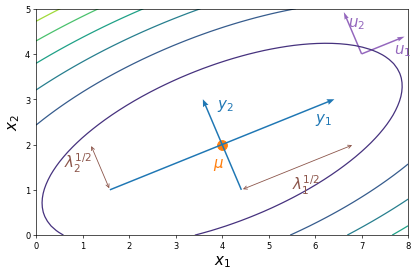

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

MU = np.array([4,2])
LAMBDA, UT = LA.eig(np.array([[6,2],
                             [2,2]]))
print(LAMBDA)
print(UT)

x,y = np.mgrid[0:8:50j, 0:5:50j]

def ellipsoids(x, y, U):
    ret = 0.0
    for i in range(len(U)):
        S = U[i][0] * (x - MU[0])
        S += U[i][1] * (y - MU[1])
        ret += S**2/LAMBDA[i]
    return ret

def main():
    fig = plt.figure(figsize=(8,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(r"$x_1$", fontsize=18)
    ax.set_ylabel(r"$x_2$", fontsize=18)

    UM = UT.T
    z = ellipsoids(x, y, UM)
    ax.contour(x, y, z)
    
    ax.scatter(MU[0], MU[1], color='C1', s=140, marker='o')
    ax.text(x=MU[0]-0.2, y=MU[1]-0.5, s=r"$\mu$", fontsize=18, color='C1')

    ax.quiver([7,7], [4,4], UM.T[0], UM.T[1], color='C4', angles='xy', scale_units='xy', scale=1, width=.004, headwidth=3)
    ax.text(x=7.7, y=4.0, s=r"$u_1$", fontsize=18, color='C4')
    ax.text(x=6.7, y=4.6, s=r"$u_2$", fontsize=18, color='C4')


    LenX, LenY = np.array((UM[0]*LAMBDA[0]**(.5),UM[1]*LAMBDA[1]**(.5))).T
    StartX = MU[0] - LenX
    StartY = MU[1] - LenY
    ax.quiver(StartX, StartY, LenX*2, LenY*2, color='C0', angles='xy', scale_units='xy', scale=1, width=.004, headwidth=4)
    ax.text(x=6.0, y=2.5, s=r"$y_1$", fontsize=18, color='C0')
    ax.text(x=3.9, y=2.8, s=r"$y_2$", fontsize=18, color='C0')

    x1 = MU[0]-LenX[0]
    y1 = MU[1]-LenY[0]
    x2 = x1 + LenX[1]
    y2 = y1 + LenY[1]
    plt.annotate(
        '', xy=(x2, y2), xycoords='data',
        xytext=(x1, y1), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'C5'})
    ax.text(x=0.6, y=1.5, s=r"$\lambda_2^{1/2}$", fontsize=18, color='C5')

    x3 = MU[0]-LenX[1]
    y3 = MU[1]-LenY[1]
    x4 = x3 + LenX[0]
    y4 = y3 + LenY[0]
    plt.annotate(
        '', xy=(x3, y3), xycoords='data',
        xytext=(x4, y4), textcoords='data',
        arrowprops={'arrowstyle': '<->', 'color':'C5'})
    ax.text(x=5.5, y=1, s=r"$\lambda_1^{1/2}$", fontsize=18, color='C5')

    plt.show()
    
if __name__=="__main__":
    main()

Further more, from the eigenvalue theorem, the determinant $|\Sigma|$ is equal to the product of its eigenvalues, and hence
$$|\Sigma|^{1/2}=\prod_{j=1}^{D}\lambda_j^{1/2}$$
Thus in the $y_j$ coordinate system, the Gaussian distribution takes the form
$$p(\mathbf{y})=\prod_{j=1}^{D}\frac{1}{(2\pi\lambda_j)^{1/2}}exp\left\{-\frac{y_j^2}{2\lambda_j}\right\}$$
which is the product of $D$ <font color='red'>independent</font> univariate Gaussian distribution. The eigenvectors therefore define a new set of shifted and rotated coordinates with respect to which the joint probability distribution factorizes into a product of independent distributions. The integral of the distribution in the y corrdinate system is then
$$\int p(\mathbf{y})d\mathbf{y}=\prod_{j=1}^D\int_{-\infty}^{\infty}\frac{1}{(2\pi\lambda_j)^{1/2}}exp\left\{-\frac{y_j^2}{2\lambda_j}\right\}dy_i=1$$

# Mean, Variance and Covariance
### Mean
$$\begin{align*}
\mathbb{E}[\mathbf{x}]
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}^T)\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right\}\mathbf{x}d\mathbf{x}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}(\mathbf{z}+\mathbf{\mu})d\mathbf{z}\qquad let\ \mathbf{z}=\mathbf{x}-\mathbf{\mu}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\left(\int \underbrace{exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}}_{even}\underbrace{\mathbf{z}}_{odd}d\mathbf{z}+\int exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}\mathbf{\mu}d\mathbf{z}\right)\\
&=\mathbf{\mu}\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}d\mathbf{z}\\
&=\mathbf{\mu}
\end{align*}$$

### Variance
$$\begin{align*}
\mathbb{E}[\mathbf{x}\mathbf{x}^T]
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}^T)\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})\right\}\mathbf{x}\mathbf{x}^Td\mathbf{x}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}(\mathbf{z}+\mathbf{\mu})(\mathbf{z}+\mathbf{\mu})^Td\mathbf{z}\qquad let\ \mathbf{z}=\mathbf{x}-\mathbf{\mu}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int \underbrace{exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}}_{even}(\mathbf{z}\mathbf{z}^T+\underbrace{\mathbf{\mu}\mathbf{z}^T+\mathbf{\mu}^T\mathbf{z}}_{odd\ vanish}+\mathbf{\mu}\mathbf{\mu}^T)d\mathbf{z}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}(\mathbf{z}\mathbf{z}^T+\mathbf{\mu}\mathbf{\mu}^T)d\mathbf{z}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\mathbf{z}^T\Sigma^{-1}\mathbf{z}\right\}\mathbf{z}\mathbf{z}^T d\mathbf{z}+\mathbf{\mu}\mathbf{\mu}^T\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\Delta^2\right\}U\mathbf{y}\mathbf{y}^TU^T (Ud\mathbf{y})+\mathbf{\mu}\mathbf{\mu}^T\qquad let\ \mathbf{y}=U^T(\mathbf{x}-\mathbf{\mu})=U^T\mathbf{z}\\
&=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\frac{1}{2}\Delta^2\right\}U\mathbf{y}\mathbf{y}^TU^T d\mathbf{y}+\mathbf{\mu}\mathbf{\mu}^T\qquad U\ is\ a\ fixed\ rotation\ matrix\ and\ det(U)=1\Rightarrow d\mathbf{y}=d\mathbf{z} \\
&=U\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\sum_{i=1}^D\frac{y_i^2}{2\lambda_i}\right\}
\begin{bmatrix}y_1^2 &0 &\cdots &0\\
0 &y_2^2 &\cdots &0\\
\vdots &\vdots &\ddots &\vdots\\
0 &0 &\cdots &y_n^2
\end{bmatrix} d\mathbf{y}U^T+\mathbf{\mu}\mathbf{\mu}^T\qquad \Delta^2=\sum_{i=1}^{D}\frac{y_i^2}{\lambda_i}\\
&=U\begin{bmatrix}P_1 &0 &\cdots &0\\
0 &P_2 &\cdots &0\\
\vdots &\vdots &\ddots &\vdots\\
0 &0 &\cdots &P_D
\end{bmatrix}U^T+\mathbf{\mu}\mathbf{\mu}^T
\end{align*}$$
where $P_k$ is given by
$$\begin{align*}
P_k&= \frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\int exp\left\{-\sum_{i=1}^D\frac{y_i^2}{2\lambda_i}\right\}y_k^2d\mathbf{y}\\
&= \frac{1}{(2\pi)^{D/2}}\frac{1}{\prod_{j=1}^{D}\lambda_j^{1/2}}\int exp\left\{-\sum_{i=1}^D\frac{y_i^2}{2\lambda_i}\right\}y_k^2d\mathbf{y}\\
&= \frac{1}{(2\pi)^{D/2}}\frac{1}{\prod_{j=1}^{D}\lambda_j^{1/2}}\int \prod_{i=1}^D exp\left\{-\frac{y_i^2}{2\lambda_i}\right\}y_k^2d\mathbf{y}\\
&= \left(\int \frac{1}{(2\pi\lambda_1)^{1/2}}exp\left\{-\frac{y_1^2}{2\lambda_1}\right\}dy_1\right)\cdots\left(\int \frac{1}{(2\pi\lambda_k)^{1/2}}exp\left\{-\frac{y_k^2}{2\lambda_k}\right\}y_k^2dy_k\right) \cdots \left(\int \frac{1}{(2\pi\lambda_D)^{1/2}}exp\left\{-\frac{y_D^2}{2\lambda_D}\right\}dy_D\right)\\
&=1\cdot 1\cdot\cdots \mathbb{E}[y_k^2]\cdots\cdot 1\cdot 1\qquad probability\ distribution\ of\ y_k\ is\ \mathcal{N}(y_k|0,\lambda_k)\\
&=\lambda_k
\end{align*}$$
Substitute $P_k=\lambda_k$ to $\mathbb{E}[\mathbf{x}\mathbf{x}^T]$
$$\mathbb{E}[\mathbf{x}\mathbf{x}^T]=U\begin{bmatrix}\lambda_1 &0 &\cdots &0\\
0 &\lambda_2 &\cdots &0\\
\vdots &\vdots &\ddots &\vdots\\
0 &0 &\cdots &\lambda_D
\end{bmatrix}U^T+\mathbf{\mu}\mathbf{\mu}^T=U\Lambda U^T+\mathbf{\mu}\mathbf{\mu}^T=\Sigma+\mathbf{\mu}\mathbf{\mu}^T$$

### Covariance
The covariance of a random vector $\mathbf{x}$ is defined by
$$\begin{align*}
cov[\mathbf{x}]&=\mathbb{E}\big[(\mathbf{x}-\mathbb{E}[\mathbf{x}])(\mathbf{x}-\mathbb{E}[\mathbf{x}])^T\big]\\
&=\mathbb{E}\big[\mathbf{x}\mathbf{x}^T-\mathbf{x}\mathbb{E}[\mathbf{x}]^T-\mathbb{E}[\mathbf{x}]\mathbf{x}^T+\mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{x}]^T\big]\\
&=\mathbb{E}[\mathbf{x}\mathbf{x}^T]-\mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{x}]^T\\
&=\Sigma
\end{align*}$$

# The limitations of Gaussian distribution
- **Too many parameters.** A general Gaussian distribution with <font color='red'>symmetric</font> covariance matrix $\Sigma$ will have $D(D+1)/2$ independent parameters, and there are another $D$ independent parameters in $\mathbf{\mu}$. For large $D$, the computation cost can be prohibitive.
- **Limited paramater variants limit freedom.** One way to address this problem is to use restricted forms of the convariancd matrix. One is diagonal, so that $\Sigma=diag(\sigma_i^2)$. Another is $\Sigma=\sigma^2 I$, known as an isotropic covariance. But these approaches limit the number of degrees of freedom in the distribution and make inversion of the covariance matrix a much faster operation. They also greatly restrict the form of the probability density and limit its ability to capture interesting correlations in the data.
- **Only one peak.** Gaussain ditribution is a intrinsically unimodal (i.e., has a single maximum) and so is unable to provide a good approximation to multimodal distribuions.